#  Dataset Description: Azure Developer Community ML Marathon Dataset

This dataset is related to a marketing campaign conducted by a bank to predict whether a client will subscribe to a term deposit. It includes various attributes related to client information, contact data, and outcomes of previous campaigns.

---

## Attribute Information

### Target Variable:
- **deposit**: Has the client subscribed to a term deposit? (Binary: `'yes'`, `'no'`)

---

### Input Variables

#### **Client-related Attributes**
1. **age** *(numeric)*: Age of the client.
2. **job** *(categorical)*: Type of job  
   Options: `'admin.'`, `'blue-collar'`, `'entrepreneur'`, `'housemaid'`, `'management'`, `'retired'`, `'self-employed'`, `'services'`, `'student'`, `'technician'`, `'unemployed'`, `'unknown'`
3. **marital** *(categorical)*: Marital status  
   Options: `'divorced'` (includes widowed), `'married'`, `'single'`, `'unknown'`
4. **education** *(categorical)*: Education level  
   Options: `'basic.4y'`, `'basic.6y'`, `'basic.9y'`, `'high.school'`, `'illiterate'`, `'professional.course'`, `'university.degree'`, `'unknown'`
5. **default** *(categorical)*: Has credit in default?  
   Options: `'no'`, `'yes'`, `'unknown'`
6. **balance** *(numeric)*: Account balance.
7. **housing** *(categorical)*: Has housing loan?  
   Options: `'no'`, `'yes'`, `'unknown'`
8. **loan** *(categorical)*: Has personal loan?  
   Options: `'no'`, `'yes'`, `'unknown'`

---

#### **Contact-related Attributes**
9. **contact** *(categorical)*: Type of communication contact  
   Options: `'cellular'`, `'telephone'`
10. **month** *(categorical)*: Last contact month of the year  
    Options: `'jan'`, `'feb'`, `'mar'`, ..., `'nov'`, `'dec'`
11. **day** *(categorical)*: Day of the week when last contacted  
    Options: `'mon'`, `'tue'`, `'wed'`, `'thu'`, `'fri'`
12. **duration** *(numeric)*: Last contact duration (in seconds)  
     **Note**: This attribute highly affects the target variable and should be used only for benchmark purposes. It should be excluded in real predictive modeling.

---

#### **Campaign-related Attributes**
13. **campaign** *(numeric)*: Number of contacts during the current campaign (includes last contact)
14. **pdays** *(numeric)*: Number of days since the client was last contacted from a previous campaign  
    Value 999 means the client was not previously contacted.
15. **previous** *(numeric)*: Number of contacts before this campaign for this client
16. **poutcome** *(categorical)*: Outcome of the previous marketing campaign  
    Options: `'failure'`, `'nonexistent'`, `'success'`


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, classification_report, accuracy_score


# Exploring Data (EDA)

In [2]:
## read data
train_df = pd.read_csv(r'C:\Users\arwah\OneDrive\سطح المكتب\marthon_azure\data.csv')
test_df = pd.read_csv(r'C:\Users\arwah\OneDrive\سطح المكتب\marthon_azure\test_data.csv')

In [3]:
train_df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [4]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,blue-collar,single,secondary,yes,477,no,no,cellular,20,nov,426,2,189,6,failure
1,49,blue-collar,married,primary,no,599,no,no,cellular,23,jul,464,1,-1,0,unknown
2,51,self-employed,single,tertiary,no,400,no,yes,cellular,27,may,200,1,-1,0,unknown
3,33,technician,married,secondary,no,488,yes,no,unknown,8,may,703,1,-1,0,unknown
4,34,admin.,married,secondary,no,40,yes,no,telephone,5,may,125,2,-1,0,unknown


In [5]:
print(train_df.shape)
print(test_df.shape)

(8371, 17)
(1723, 16)


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1723 non-null   int64 
 1   job        1723 non-null   object
 2   marital    1723 non-null   object
 3   education  1723 non-null   object
 4   default    1723 non-null   object
 5   balance    1723 non-null   int64 
 6   housing    1723 non-null   object
 7   loan       1723 non-null   object
 8   contact    1723 non-null   object
 9   day        1723 non-null   int64 
 10  month      1723 non-null   object
 11  duration   1723 non-null   int64 
 12  campaign   1723 non-null   int64 
 13  pdays      1723 non-null   int64 
 14  previous   1723 non-null   int64 
 15  poutcome   1723 non-null   object
dtypes: int64(7), object(9)
memory usage: 215.5+ KB


# Exploring Training Data

In [7]:
df=train_df

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
for col in df.columns:
    print(f"{col} Table")
    freq_table = df[col].value_counts(dropna=False).reset_index()
    display(freq_table)

age Table


,age,count
0,31,370
1,32,368
2,34,354
3,35,347
4,33,343
...,...,...
70,90,2
71,92,2
72,95,1
73,88,1


job Table


,job,count
0,management,1923
1,blue-collar,1472
2,technician,1371
3,admin.,1017
4,services,671
5,retired,563
6,self-employed,307
7,unemployed,282
8,student,273
9,entrepreneur,244


marital Table


,marital,count
0,married,4744
1,single,2645
2,divorced,982


education Table


,education,count
0,secondary,4113
1,tertiary,2754
2,primary,1128
3,unknown,376


default Table


,default,count
0,no,8244
1,yes,127


balance Table


,balance,count
0,0,601
1,2,29
2,3,26
3,1,20
4,4,20
...,...,...
3283,11835,1
3284,7426,1
3285,3444,1
3286,-491,1


housing Table


,housing,count
0,no,4354
1,yes,4017


loan Table


,loan,count
0,no,7250
1,yes,1121


contact Table


,contact,count
0,cellular,6041
1,unknown,1763
2,telephone,567


day Table


,day,count
0,20,435
1,18,422
2,5,362
3,15,361
4,30,350
5,12,346
6,13,343
7,6,336
8,14,334
9,21,332


month Table


,month,count
0,may,2135
1,jul,1152
2,aug,1150
3,jun,912
4,nov,698
5,apr,661
6,feb,595
7,oct,280
8,jan,257
9,sep,241


duration Table


,duration,count
0,119,32
1,97,30
2,144,30
3,87,29
4,112,29
...,...,...
1319,1452,1
1320,3,1
1321,2015,1
1322,1224,1


campaign Table


,campaign,count
0,1,3600
1,2,2257
2,3,998
3,4,592
4,5,270
5,6,192
6,7,104
7,8,103
8,9,54
9,10,42


pdays Table


,pdays,count
0,-1,6268
1,92,87
2,182,69
3,181,65
4,91,62
...,...,...
421,61,1
422,373,1
423,395,1
424,132,1


previous Table


,previous,count
0,0,6268
1,1,648
2,2,521
3,3,333
4,4,183
5,5,122
6,6,79
7,7,50
8,8,48
9,9,25


poutcome Table


,poutcome,count
0,unknown,6269
1,failure,895
2,success,807
3,other,400


deposit Table


,deposit,count
0,no,4428
1,yes,3943


In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000
mean,41.197467,1517.811134,15.588460,372.898698,2.512603,49.911958,0.823677
std,11.809300,3225.312218,8.406768,346.706743,2.734037,107.308417,2.315285
min,18.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,116.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,39.000000,532.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1694.000000,21.000000,504.000000,3.000000,2.000000,1.000000
max,95.000000,81204.000000,31.000000,3284.000000,63.000000,854.000000,58.000000


In [12]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,8371,8371,8371,8371,8371,8371,8371,8371,8371,8371
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,1923,4744,4113,8244,4354,7250,6041,2135,6269,4428


In [13]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(df, title="Titanic Dataset Profile", explorative=True)

# Display the report in Jupyter notebook (if you're using one)
#profile.to_notebook_iframe()

# Or save the report as an HTML file
#profile.to_file("titanic_profile_report.html")

# Cleaning Trained Data

In [14]:
df_cleaned=df

In [15]:
# The precentage of unknown on poutcome is high
(df_cleaned['poutcome']=='unknown').sum()/df_cleaned['poutcome'].count()*100

74.88949946242982

In [16]:
df_cleaned=df_cleaned.drop(columns=['poutcome', 'contact'])

In [17]:
# Create a new column for balance groups
df_cleaned["balance_group"] = ""

for idx, bal in enumerate(df_cleaned["balance"]):
    if  bal <= 1000:
        df_cleaned.at[idx, "balance_group"] = "Low (0-1K)"
    elif bal > 1000 and bal <= 5000:
        df_cleaned.at[idx, "balance_group"] = "Medium (1K-5K)"
    else:
        df_cleaned.at[idx, "balance_group"] = "High (5K+)"


<Axes: >

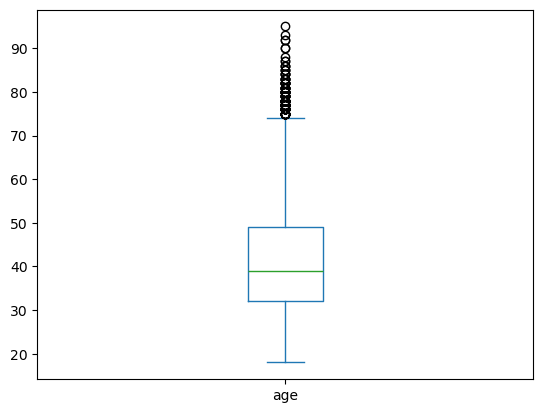

In [18]:
df_cleaned.age.plot(kind="box")

In [19]:
df_cleaned["age_group"] = ""

for idx, age in enumerate(df_cleaned["age"]):
    if age <= 30:
        df_cleaned.loc[idx, "age_group"] = "18-30"
    elif age <= 45:
        df_cleaned.loc[idx, "age_group"] = "31-45"
    elif age <= 60:
        df_cleaned.loc[idx, "age_group"] = "46-60"
    else:
        df_cleaned.loc[idx, "age_group"] = "60+"


In [20]:
df_cleaned["day_group"]=""

for i ,day in enumerate(df_cleaned['day']):
    if day <= 10:
        df_cleaned.loc[i,'day_group']="beginning"
    elif day > 10 and day < 20:
        df_cleaned.loc[i,'day_group']="middle"
    else:
        df_cleaned.loc[i,'day_group']="end"


In [21]:
# combine day and month column to a new column
df['day'] = df['day'].astype(str)
df['month'] = df['month'].astype(str)
df_cleaned['day_month'] = df['day'] + '-' + df['month']

In [22]:
(df['default']=='no').sum() / df['default'].count() *100

98.48285748417155

In [23]:
df_cleaned = df_cleaned.drop(columns=[ 'balance','default'])

In [24]:
df_cleaned.head()

,age,job,marital,education,housing,loan,day,month,duration,campaign,pdays,previous,deposit,balance_group,age_group,day_group,day_month
0,38,technician,married,tertiary,yes,no,14,oct,113,1,50,2,no,Low (0-1K),31-45,middle,14-oct
1,41,housemaid,married,primary,no,no,8,aug,203,5,-1,0,no,Low (0-1K),31-45,beginning,8-aug
2,39,management,single,tertiary,yes,no,4,may,716,3,263,2,yes,Medium (1K-5K),31-45,beginning,4-may
3,49,blue-collar,married,primary,yes,no,11,may,549,1,-1,0,no,High (5K+),46-60,middle,11-may
4,37,services,married,secondary,yes,yes,29,jan,404,2,251,6,no,Medium (1K-5K),31-45,end,29-jan


In [25]:
#Replacing -1 with 0 days
df_cleaned['pdays'] = df['pdays'].replace(-1, 0)

In [26]:
df_cleaned.head()

,age,job,marital,education,housing,loan,day,month,duration,campaign,pdays,previous,deposit,balance_group,age_group,day_group,day_month
0,38,technician,married,tertiary,yes,no,14,oct,113,1,50,2,no,Low (0-1K),31-45,middle,14-oct
1,41,housemaid,married,primary,no,no,8,aug,203,5,0,0,no,Low (0-1K),31-45,beginning,8-aug
2,39,management,single,tertiary,yes,no,4,may,716,3,263,2,yes,Medium (1K-5K),31-45,beginning,4-may
3,49,blue-collar,married,primary,yes,no,11,may,549,1,0,0,no,High (5K+),46-60,middle,11-may
4,37,services,married,secondary,yes,yes,29,jan,404,2,251,6,no,Medium (1K-5K),31-45,end,29-jan


- Poutcome:
About 75% of the values were 'unknown', so we removed this column due to lack of useful information.

- Contact:
This column only showed whether the client was contacted by cellular or telephone, which wasn’t useful for analysis, so we dropped it.

- Default:
Since 98% of the values were 'no', this column didn’t add much value and was removed.

- Balance Groups:
We grouped balance into: (Low: 0–1K), (Medium: 1K–5K),(High: 5K+)

- Age Groups:
Age was grouped into: (18–30),(31–45),(46–60),(60+)

- Day Groups:
Days were grouped as:(Beginning: 1–10),(Middle: 11–20),(End: 21–31)

- Day-Month Grouping:
We also combined day and month to look at patterns in client contact timing.

# Data Analysis & Data visualizations

# **Univariate Analysis**

# **Numerical**

# **Pdays**

In [27]:
#75% of customers were contacted for the first time
((df_cleaned['pdays'] == 0).sum() / len(df) * 100).round(2)

74.88

<Axes: ylabel='Frequency'>

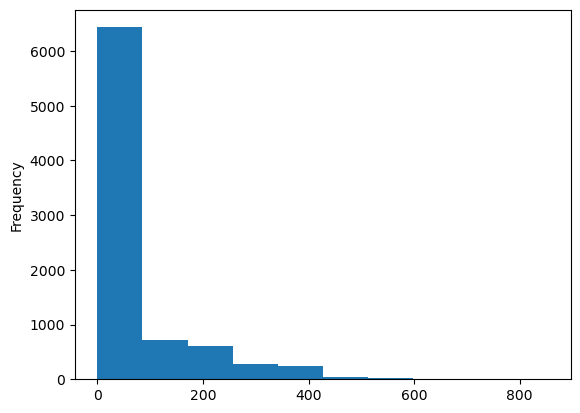

In [28]:
df_cleaned.pdays.plot(kind='hist')

# **Day**

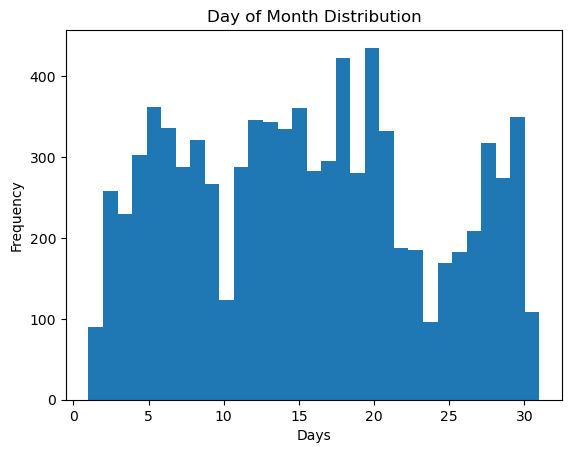

In [29]:
df_cleaned['day'].plot(kind='hist', bins=31)
plt.title('Day of Month Distribution')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

# **Categorical**

# **Age**

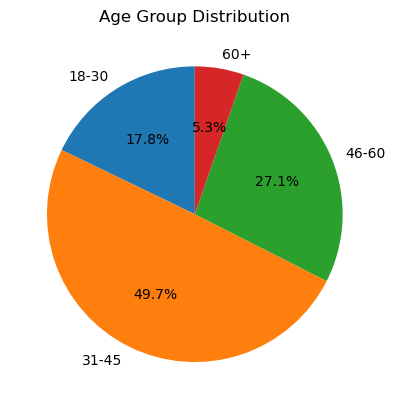

In [30]:
df_cleaned['age_group'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')  # Hides the y-label
plt.title('Age Group Distribution')
plt.show()


# **Marital**

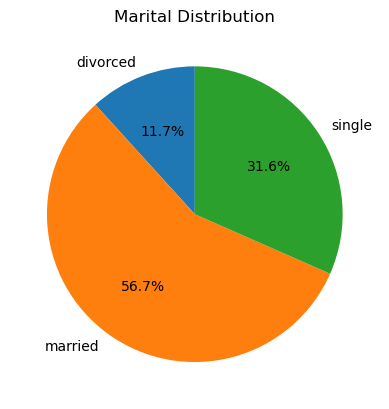

In [31]:
df_cleaned['marital'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')  # Hides the y-label
plt.title('Marital Distribution')
plt.show()


Job

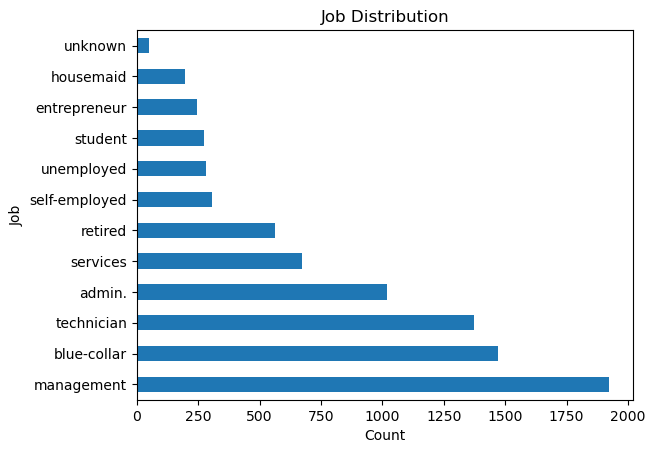

In [32]:
df_cleaned['job'].value_counts().plot(kind='barh')
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

# **Education**

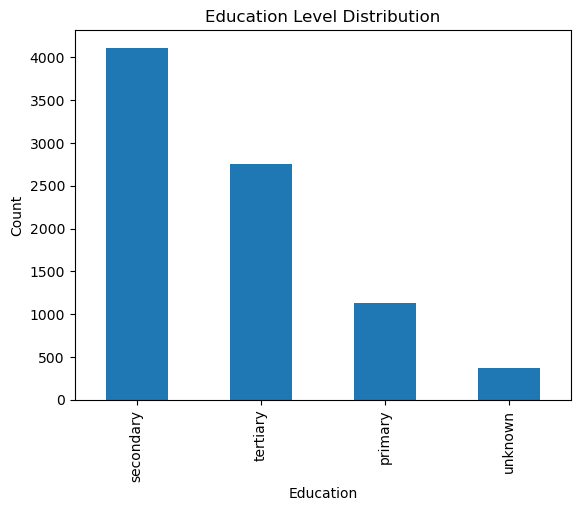

In [33]:
df_cleaned['education'].value_counts().plot(kind='bar')
plt.title('Education Level Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

# **Balance Group**

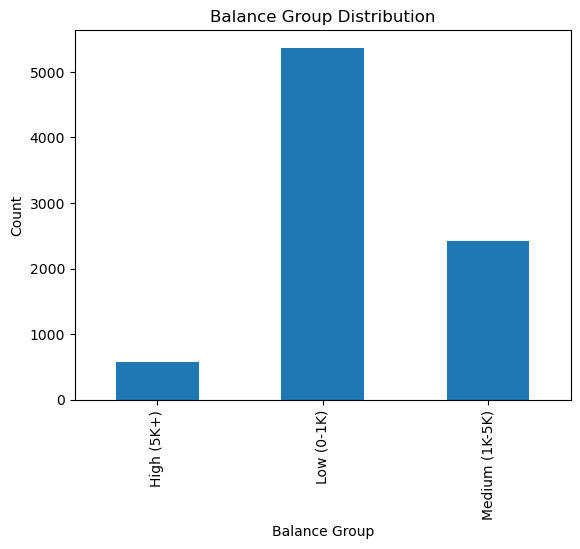

In [34]:
df_cleaned['balance_group'].value_counts().sort_index().plot(kind='bar')
plt.title('Balance Group Distribution')
plt.xlabel('Balance Group')
plt.ylabel('Count')
plt.show()

# **Housing**

Text(0, 0.5, 'Count')

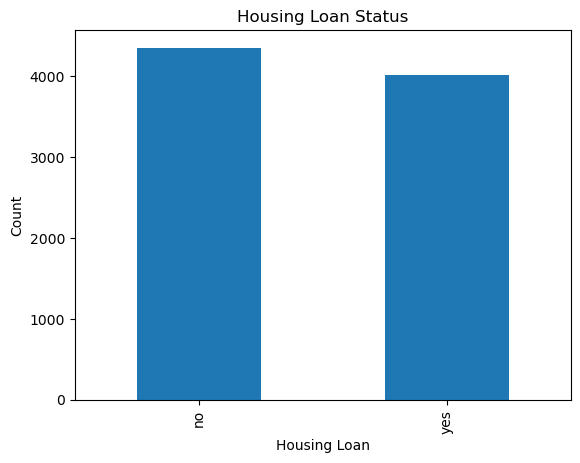

In [35]:
df_cleaned['housing'].value_counts().plot(kind='bar')
plt.title('Housing Loan Status')
plt.xlabel('Housing Loan')
plt.ylabel('Count')

# **Loan**

Text(0, 0.5, 'Count')

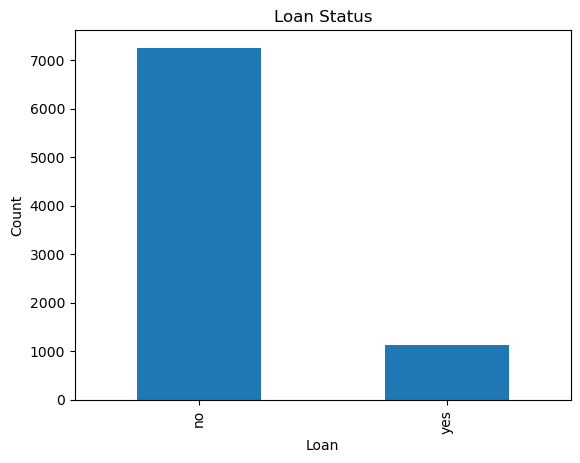

In [36]:
df_cleaned['loan'].value_counts().plot(kind='bar')
plt.title("Loan Status")
plt.xlabel("Loan")
plt.ylabel("Count")

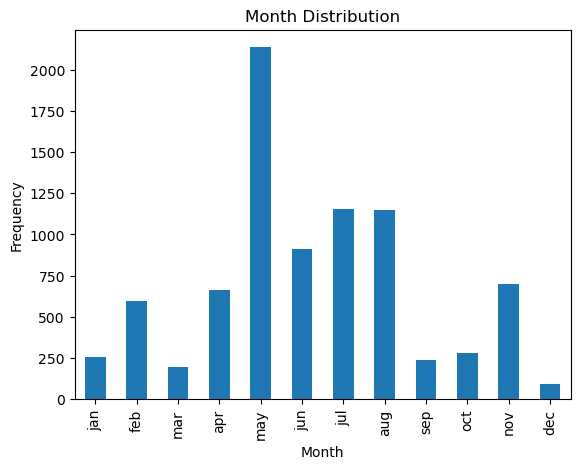

In [37]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df_cleaned['month'].value_counts().reindex(month_order).plot(kind='bar')
plt.title('Month Distribution')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()


# **Day Group**

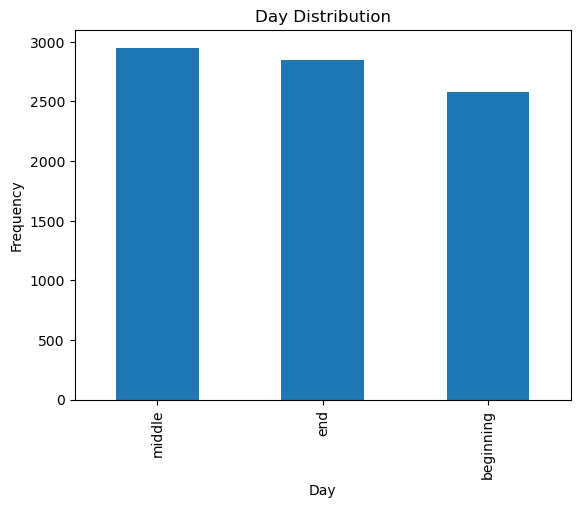

In [38]:
df_cleaned['day_group'].value_counts().plot(kind='bar')
plt.title('Day Distribution')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()


**Duration shouldn't be used in real-world prediction because you won’t know it ahead of time**


In [39]:
#Keep original dataset with duration

#dfwdur = df.copy()

#Create a copy without duration

#dfwodur = df.drop(columns=['duration'])

# **Bivariate Analysis**

# **Categorical vs Binary**

In [40]:
pd.crosstab(df_cleaned['deposit'], df_cleaned['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
deposit,,,,,,,,,,,,
no,537,937,150,116,952,190,169,400,70,755,126,26
yes,480,535,94,81,971,373,138,271,203,616,156,25


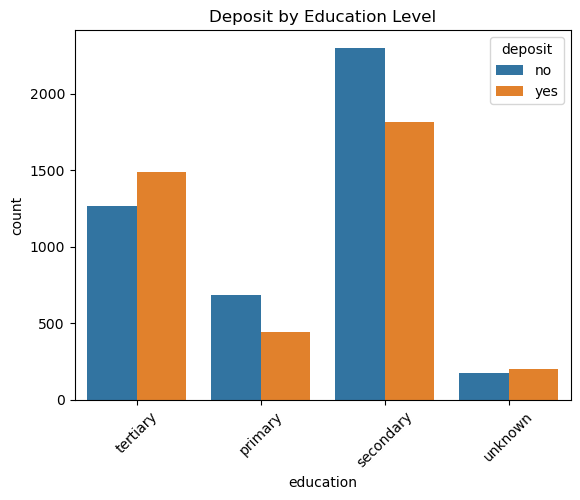

In [41]:
sns.countplot(data=df_cleaned, x='education', hue='deposit')
plt.title("Deposit by Education Level")
plt.xticks(rotation=45)
plt.show()

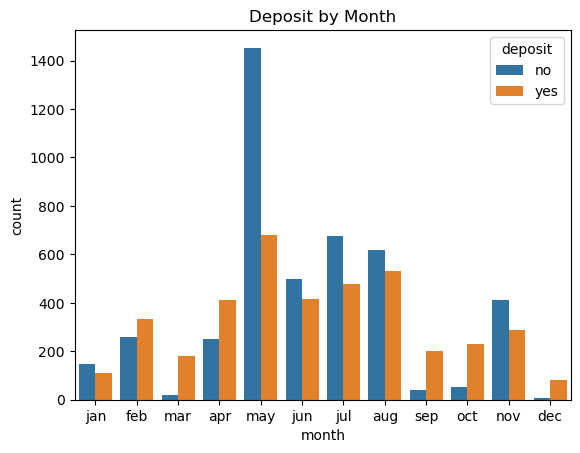

In [42]:
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
sns.countplot(data=df_cleaned, x='month', hue='deposit', order=month_order)
plt.title("Deposit by Month")
plt.show()

# Multivariate Analysis

<Figure size 900x500 with 0 Axes>

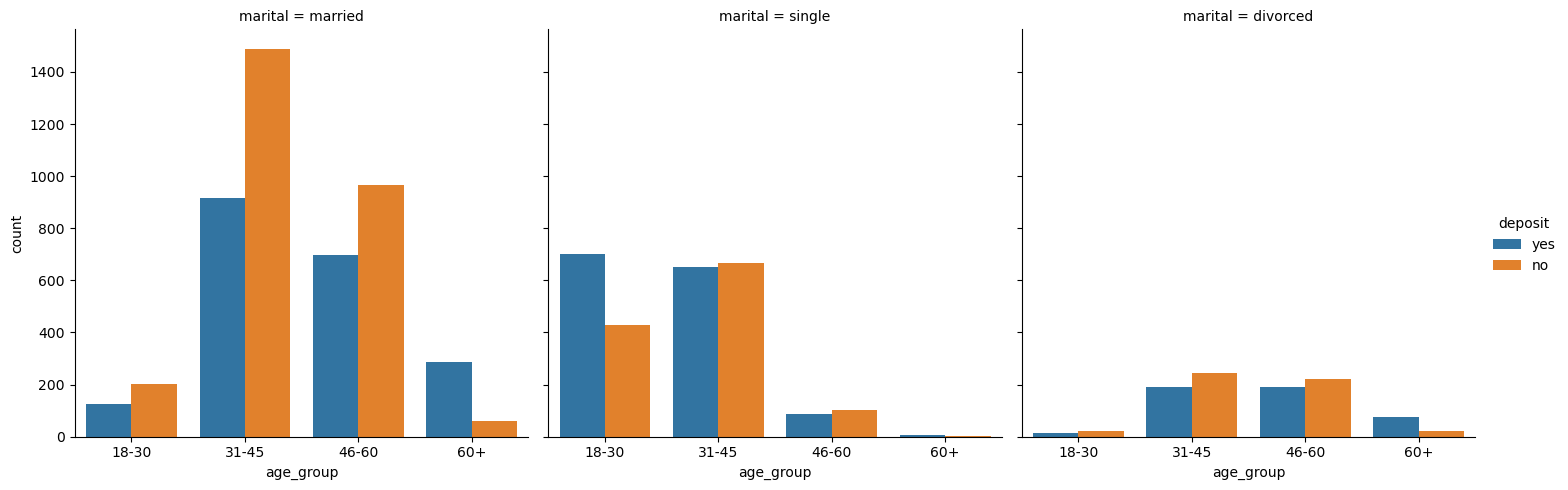

In [43]:
plt.figure(figsize=(9, 5))
sns.catplot(data=df_cleaned,x='age_group', hue='deposit', col='marital',
            order=['18-30', '31-45', '46-60', '60+']
            ,hue_order=["yes",'no'],
            kind='count'
        )

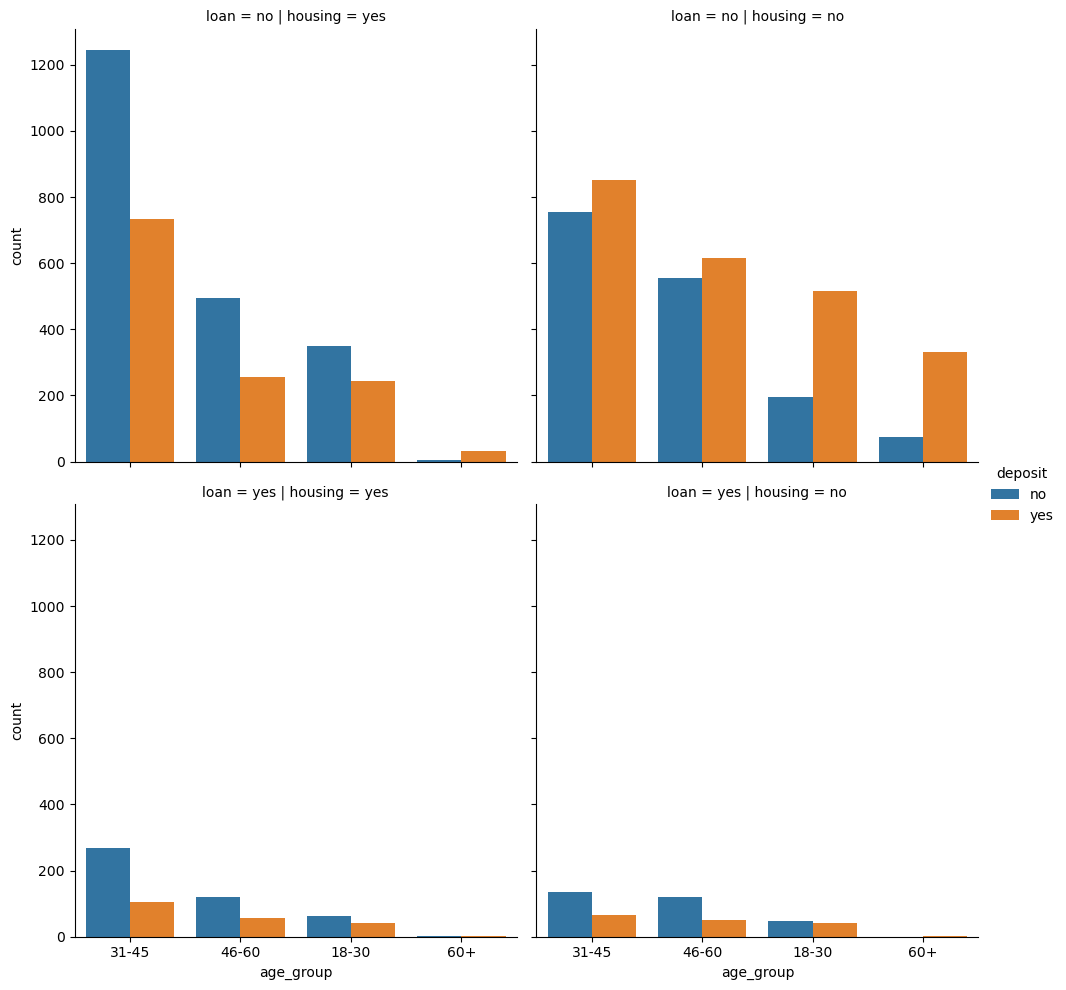

In [44]:
sns.catplot(data=df_cleaned, x='age_group', hue='deposit', col='housing', row='loan', kind='count')
plt.show()

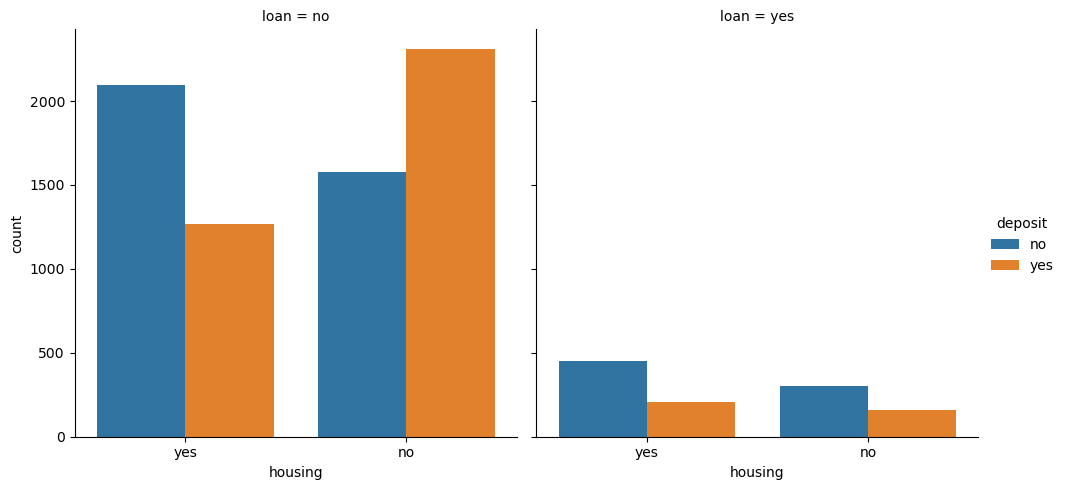

In [45]:
sns.catplot(data=df_cleaned, x='housing', hue='deposit', col='loan', kind='count')
plt.show()

In [46]:
df.groupby(['education', 'marital', 'deposit'])['balance'].mean().unstack().round(2).sort_values(by='yes', ascending=False)

,deposit,no,yes
education,marital,,
tertiary,divorced,1209.34,2689.95
unknown,single,811.18,2643.08
tertiary,single,1325.31,2192.69
unknown,married,1496.36,2088.98
primary,single,1038.79,1844.90
tertiary,married,1688.74,1835.54
primary,married,1383.08,1823.07
secondary,married,1222.55,1757.76
unknown,divorced,1835.38,1556.29


In [47]:
deposit_rate = df.groupby(['education', 'marital'])['deposit'].value_counts(normalize=True).unstack()*100
deposit_rate = deposit_rate.round(1)
print(deposit_rate)

deposit               no   yes
education marital             
primary   divorced  48.0  52.0
          married   64.3  35.7
          single    54.0  46.0
secondary divorced  55.2  44.8
          married   59.5  40.5
          single    49.8  50.2
tertiary  divorced  48.4  51.6
          married   50.5  49.5
          single    39.7  60.3
unknown   divorced  55.3  44.7
          married   49.1  50.9
          single    40.8  59.2


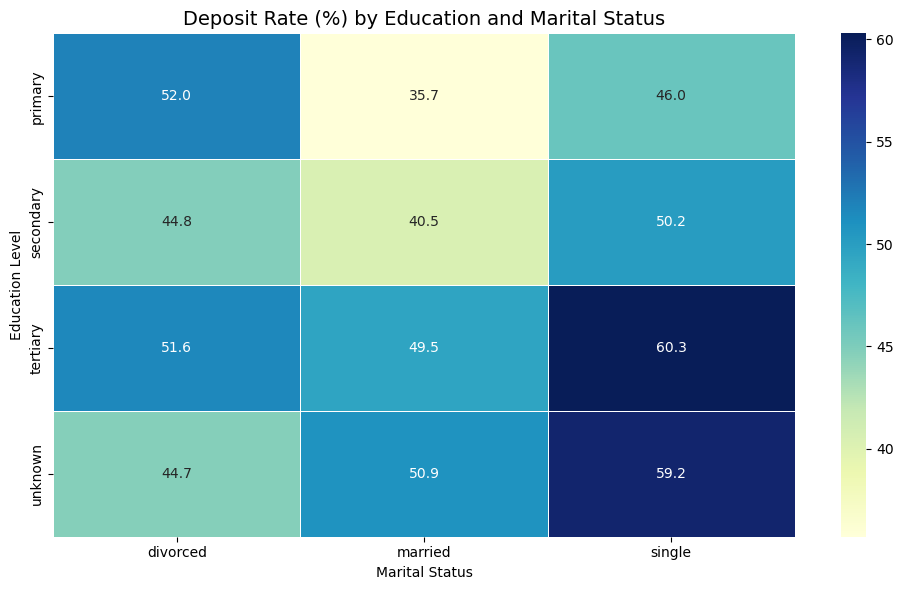

In [48]:
deposit_rate = df_cleaned.groupby(['education', 'marital'])['deposit'].value_counts(normalize=True).unstack() * 100
deposit_rate = deposit_rate.round(1).reset_index()

heatmap_data = deposit_rate.pivot(index='education', columns='marital', values='yes')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title("Deposit Rate (%) by Education and Marital Status", fontsize=14)
plt.xlabel("Marital Status")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()


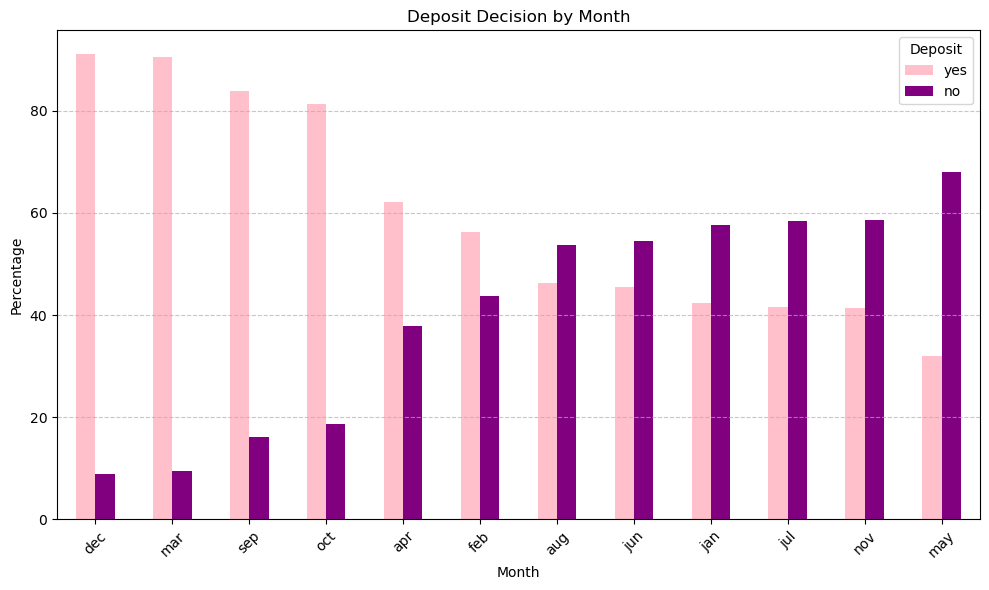

In [49]:
deposit_by_month = df.groupby('month')['deposit'].value_counts(normalize=True).unstack() * 100
deposit_by_month = deposit_by_month[['yes', 'no']].round(1)

deposit_by_month_sorted = deposit_by_month.sort_values(by='yes', ascending=False)
deposit_by_month_sorted[['yes', 'no']].plot(kind='bar', figsize=(10,6), color=['pink', 'purple'])
plt.title('Deposit Decision by Month')
plt.ylabel('Percentage')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Deposit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Insights:

* The highest deposit rate is for tertiary-educated singles (60.3%) — this group is both likely to deposit and has high balances, making them a prime target group
* Married individuals with primary education have the lowest deposit rate (35.7%), potentially needing more engagement or trust-building
* Tertiary-educated Singles have the highest deposit rate at 60.3%. They also have a high average balance (≈ 2192.69), suggesting both willingness and ability to deposit.
* Tertiary education is positively associated with higher deposit rates across all marital statuses. Higher education likely contributes to better financial awareness or trust in financial products.
* Single individuals (across education levels) tend to have higher deposit rates than married or divorced ones.


In [50]:
df_cleaned.head()

,age,job,marital,education,housing,loan,day,month,duration,campaign,pdays,previous,deposit,balance_group,age_group,day_group,day_month
0,38,technician,married,tertiary,yes,no,14,oct,113,1,50,2,no,Low (0-1K),31-45,middle,14-oct
1,41,housemaid,married,primary,no,no,8,aug,203,5,0,0,no,Low (0-1K),31-45,beginning,8-aug
2,39,management,single,tertiary,yes,no,4,may,716,3,263,2,yes,Medium (1K-5K),31-45,beginning,4-may
3,49,blue-collar,married,primary,yes,no,11,may,549,1,0,0,no,High (5K+),46-60,middle,11-may
4,37,services,married,secondary,yes,yes,29,jan,404,2,251,6,no,Medium (1K-5K),31-45,end,29-jan


# Machine learning

In [51]:
train_x = df_cleaned.drop(["deposit"],axis=1)
#train_x.head()
train_y = df_cleaned[['deposit']]
#train_y.head()

In [52]:
train_x

,age,job,marital,education,housing,loan,day,month,duration,campaign,pdays,previous,balance_group,age_group,day_group,day_month
0,38,technician,married,tertiary,yes,no,14,oct,113,1,50,2,Low (0-1K),31-45,middle,14-oct
1,41,housemaid,married,primary,no,no,8,aug,203,5,0,0,Low (0-1K),31-45,beginning,8-aug
2,39,management,single,tertiary,yes,no,4,may,716,3,263,2,Medium (1K-5K),31-45,beginning,4-may
3,49,blue-collar,married,primary,yes,no,11,may,549,1,0,0,High (5K+),46-60,middle,11-may
4,37,services,married,secondary,yes,yes,29,jan,404,2,251,6,Medium (1K-5K),31-45,end,29-jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,52,management,married,tertiary,no,no,25,may,272,1,0,0,Low (0-1K),46-60,end,25-may
8367,39,services,married,secondary,no,no,4,feb,658,3,0,0,Medium (1K-5K),31-45,beginning,4-feb
8368,38,blue-collar,married,primary,yes,no,20,may,245,1,0,0,Low (0-1K),31-45,end,20-may
8369,59,retired,divorced,unknown,yes,no,13,may,248,2,0,0,Low (0-1K),46-60,middle,13-may


# one hot encoding for categorical columns

In [53]:
encoded_columns = list(train_x.select_dtypes(include='object').columns.values)
le_col = ['education']
to_remove = ['education', 'balance_group', 'age_group', 'day_group', 'day_month']
encoded_columns = [col for col in encoded_columns if col not in to_remove]
encoded_columns

['job', 'marital', 'housing', 'loan', 'month']

In [54]:
train_x= pd.get_dummies(train_x, prefix=encoded_columns, columns=encoded_columns, drop_first=True)

label encoding in education

In [55]:
education_dic = {'unknown': 0,
          'primary': 1,
          'secondary': 2,
          'tertiary': 3}
train_x['education'] = train_x['education'].replace(education_dic)
train_x['education'].value_counts(normalize=True)
train_x.head(1)
train_x.drop(['balance_group', 'age_group', 'day_group','day_month'],inplace=True,axis=1)

C:\Users\arwah\AppData\Local\Temp\ipykernel_22204\1948088559.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_x['education'] = train_x['education'].replace(education_dic)


In [56]:
train_x.head()

,age,education,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,38,3,14,113,1,50,2,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,41,1,8,203,5,0,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,39,3,4,716,3,263,2,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,49,1,11,549,1,0,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,37,2,29,404,2,251,6,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [57]:
# Encode target variable
y_dict = {'no': 0,
         'yes': 1}
train_y['deposit'] = train_y['deposit'].replace(y_dict)
train_y['deposit'].value_counts(normalize=True)

C:\Users\arwah\AppData\Local\Temp\ipykernel_22204\2420129935.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_y['deposit'] = train_y['deposit'].replace(y_dict)
C:\Users\arwah\AppData\Local\Temp\ipykernel_22204\2420129935.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y['deposit'] = train_y['deposit'].replace(y_dict)


deposit
0    0.528969
1    0.471031
Name: proportion, dtype: float64

In [58]:
train_x.astype(int)

,age,education,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,38,3,14,113,1,50,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,41,1,8,203,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,39,3,4,716,3,263,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,49,1,11,549,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,37,2,29,404,2,251,6,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,52,3,25,272,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8367,39,2,4,658,3,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8368,38,1,20,245,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8369,59,0,13,248,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [59]:
print(test_df.columns)
print(train_x.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
Index(['age', 'education', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'housing_yes', 'loan_yes',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep'],
      dtype='object')


preparing_test_data

In [60]:
test_final=test_df.drop(["default",'pdays','poutcome','contact'],axis=1,inplace=True)

In [61]:
test_x = train_x
test_y = train_y
#no y column in test data >> cannot use the test_data >>  i will use train data split it into validation 

In [62]:
print(test_x.shape)
print(test_y.shape)

(8371, 33)
(8371, 1)


In [63]:
test_x.head()

,age,education,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,38,3,14,113,1,50,2,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,41,1,8,203,5,0,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,39,3,4,716,3,263,2,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,49,1,11,549,1,0,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,37,2,29,404,2,251,6,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [64]:
test_y.head()

,deposit
0,0
1,0
2,1
3,0
4,0


In [65]:
train_x.head()

,age,education,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,38,3,14,113,1,50,2,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,41,1,8,203,5,0,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,39,3,4,716,3,263,2,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,49,1,11,549,1,0,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,37,2,29,404,2,251,6,False,False,False,...,False,False,True,False,False,False,False,False,False,False


# Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
dc = DecisionTreeClassifier(max_depth=30, min_samples_split=10, min_samples_leaf=10,
                            random_state=40, class_weight="balanced")

In [67]:
# Define a scorer
rs = make_scorer(recall_score)

# Cross validation
cv = cross_val_score(dc, train_x, train_y, cv=10, n_jobs=-1, scoring=rs)
print("Cross validation scores: {}".format(cv))
print("%0.2f recall with a standard deviation of %0.2f" % (cv.mean(), cv.std()))
#consistent across different data splits

Cross validation scores: [0.80759494 0.83756345 0.81979695 0.82233503 0.79441624 0.83756345
 0.82741117 0.8071066  0.84303797 0.80759494]
0.82 recall with a standard deviation of 0.02


In [68]:
dc.fit(train_x, train_y)

DecisionTreeClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=40)

In [69]:
pred = dc.predict(train_x)
print("The train recall score is {}".format(np.round(recall_score(train_y, pred), 2)))

The train recall score is 0.89


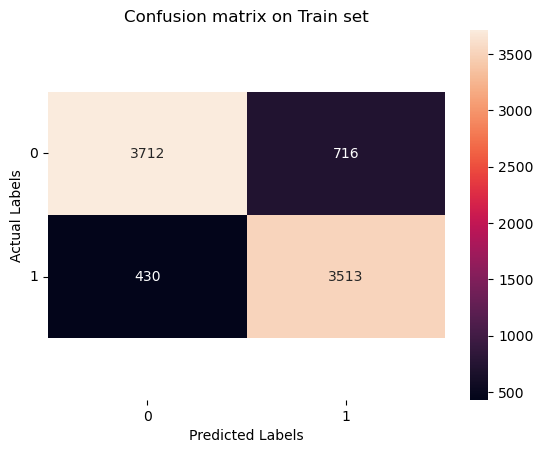

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      4428
           1       0.83      0.89      0.86      3943

    accuracy                           0.86      8371
   macro avg       0.86      0.86      0.86      8371
weighted avg       0.87      0.86      0.86      8371



In [70]:
plt.title("Confusion matrix on Train set")
ax = sns.heatmap(confusion_matrix(train_y, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(train_y, pred))


rue Positive (TP) = 3513 → Correctly predicted as deposit-paying customers.

True Negative (TN) = 3712 → Correctly predicted as not paying.

False Positive (FP) = 716 → Incorrectly predicted as deposit-paying (but they didn’t actually pay).

False Negative (FN) = 430 → Incorrectly predicted as not paying they actually paid

In [71]:
# Get predictions from the test dataset
pred = dc.predict(test_x)
# print(pred.shape[0])
print("The test recall score is {}".format(np.round(recall_score(test_y, pred), 3)))

The test recall score is 0.891


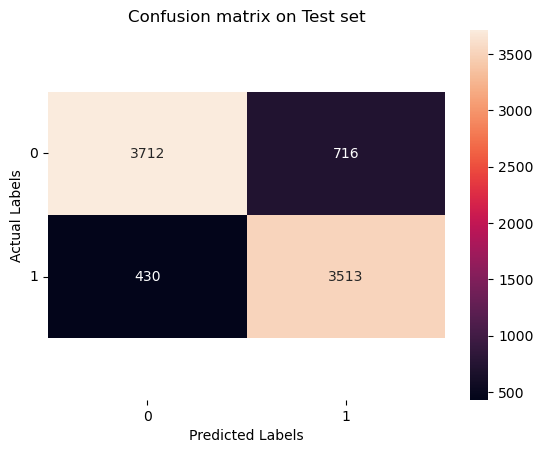

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      4428
           1       0.83      0.89      0.86      3943

    accuracy                           0.86      8371
   macro avg       0.86      0.86      0.86      8371
weighted avg       0.87      0.86      0.86      8371



In [72]:
plt.title("Confusion matrix on Test set")
ax = sns.heatmap(confusion_matrix(test_y, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(test_y, pred))

# Random forest classifier

In [73]:
rf = RandomForestClassifier(n_jobs=-1, random_state=40, class_weight="balanced_subsample")
rs = make_scorer(recall_score)

In [74]:
cv = cross_val_score(rf, train_x, train_y, cv=10, n_jobs=-1, scoring=rs)
print("Cross validation scores: {}".format(cv))
print("%0.2f recall with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

Cross validation scores: [0.84556962 0.85786802 0.85786802 0.86548223 0.83502538 0.88324873
 0.87309645 0.88832487 0.86835443 0.86835443]
0.86 recall with a standard deviation of 0.02


In [75]:
rf.fit(train_x, train_y)

c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced_subsample', n_jobs=-1,
                       random_state=40)

In [76]:
# Get predictions from the train dataset
pred = rf.predict(train_x)
print("The train recall score is {}".format(np.round(recall_score(train_y, pred), 2)))

The train recall score is 1.0


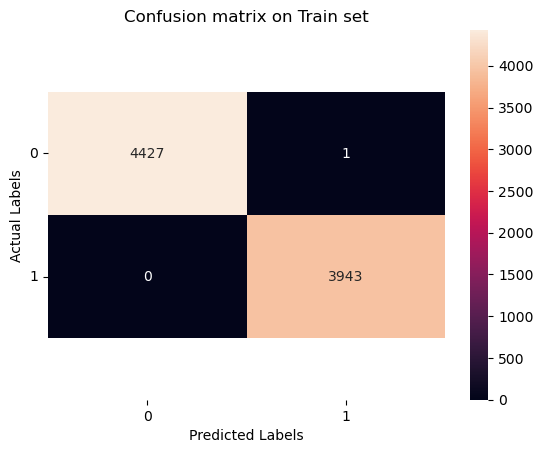

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4428
           1       1.00      1.00      1.00      3943

    accuracy                           1.00      8371
   macro avg       1.00      1.00      1.00      8371
weighted avg       1.00      1.00      1.00      8371



In [77]:
plt.title("Confusion matrix on Train set")
ax = sns.heatmap(confusion_matrix(train_y, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(train_y, pred))

The test recall score is 1.0


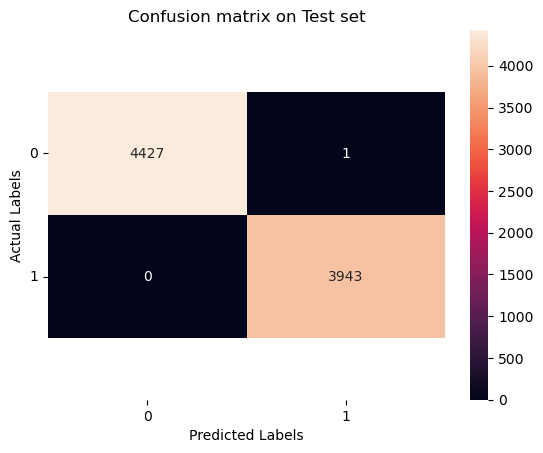

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4428
           1       1.00      1.00      1.00      3943

    accuracy                           1.00      8371
   macro avg       1.00      1.00      1.00      8371
weighted avg       1.00      1.00      1.00      8371



In [78]:
# Get predictions from the test dataset
pred = rf.predict(test_x)
print("The test recall score is {}".format(np.round(recall_score(test_y, pred), 2)))

plt.title("Confusion matrix on Test set")
ax = sns.heatmap(confusion_matrix(test_y, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(test_y, pred))

In [79]:
pred = rf.predict(train_x)

# Loop through first 5 predictions
for index, i in enumerate(pred[:5]):
    print("For this user Profile:\n")
    print(train_x.iloc[[index]])  
    
    if i == 0:
        print('Client will subscribe: No')
    else:
        print('Client will subscribe: Yes')
        
    print('\n' * 5) 


For this user Profile:

   age  education  day  duration  campaign  pdays  previous  job_blue-collar  \
0   38          3   14       113         1     50         2            False   

   job_entrepreneur  job_housemaid  ...  month_dec  month_feb  month_jan  \
0             False          False  ...      False      False      False   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0      False      False      False      False      False       True      False  

[1 rows x 33 columns]
Client will subscribe: No






For this user Profile:

   age  education  day  duration  campaign  pdays  previous  job_blue-collar  \
1   41          1    8       203         5      0         0            False   

   job_entrepreneur  job_housemaid  ...  month_dec  month_feb  month_jan  \
1             False           True  ...      False      False      False   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
1      False      False   

# Feature Importance according to Random Forest Classifier

c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


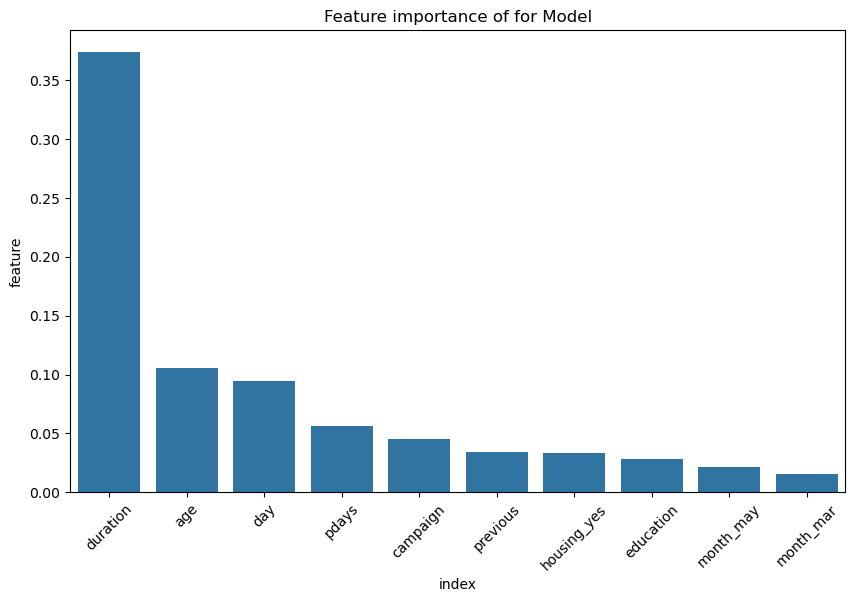

In [80]:
def build_feature_importance(model, X_train, y_train):
    rf.fit(X_train, y_train)
    data = pd.DataFrame(rf.feature_importances_, X_train.columns, columns=["feature"])
    data = data.sort_values(by='feature', ascending=False).reset_index()
    plt.figure(figsize=[10,6])
    sns.barplot(y='feature', x='index', data=data[:10])
    plt.title('Feature importance of for Model')
    plt.xticks(rotation=45)
    plt.show();

build_feature_importance(RandomForestClassifier, train_x, train_y)

# pip line creation

In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

numeric_features = ['age', 'balance', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

df = train_df.copy()
X = df.drop('deposit', axis=1)
y = df['deposit']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7098507462686567
              precision    recall  f1-score   support

          no       0.70      0.78      0.74       884
         yes       0.72      0.63      0.67       791

    accuracy                           0.71      1675
   macro avg       0.71      0.71      0.71      1675
weighted avg       0.71      0.71      0.71      1675



In [82]:
import joblib

joblib.dump(pipeline, 'final_model.pkl')

['final_model.pkl']